# IMPORTING DEPENDECIES

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
from matplotlib import pyplot as plt
from librosa import display
from os import path
from pydub import AudioSegment
from gc import callbacks
import tensorflow as tf 
import tensorboard
import numpy as np
import cv2 as cv 
import librosa 
import os


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


# DEFINING THE TRAINING PATHS

In [2]:
Male = os.path.join('MAIN DATA','train','male')
Female = os.path.join('MAIN DATA','train','female')

# SPECTRA PLOTTING TRAIN

In [3]:
def wave_plot(data):
    y,sr=librosa.load(data)
    stft=librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
    plt.figure()
    librosa.display.specshow(S_db)

NameError: name 'y' is not defined

In [ ]:
for i in os.listdir(Male):
    PATH_MALE=os.path.join(Male,i)
    wave_plot(PATH_MALE)
    plt.savefig("Train_male\Male{}.png".format(i))

In [ ]:
for j in os.listdir(Female):
    PATH_FEMALE=os.path.join(Female,j)
    wave_plot(PATH_FEMALE)
    plt.savefig("Train_female\Female{}.png".format(j))


# DL MODEL

In [ ]:
tensor_board= TensorBoard(log_dir='My_model')

model=tf.keras.Sequential([
    	tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(432,288,3)),
    	tf.keras.layers.MaxPooling2D(3,3),
    
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

    	tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
    	tf.keras.layers.Dense(1, activation='sigmoid')]
)

model.summary()
model.compile(loss='BinaryCrossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
train_datagen = ImageDataGenerator(rescale=1./250)
training_set = train_datagen.flow_from_directory(r'C:\PROJECTS\AI\AUDIO CLASSIFIER\data3\train',
                                                 target_size=(432,288),
                                                 batch_size=20,  
                                                 color_mode='rgb',
                                                 class_mode='binary')
test_datagen=ImageDataGenerator(rescale=1./250,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

testing_set=test_datagen.flow_from_directory(r'C:\PROJECTS\AI\AUDIO CLASSIFIER\data3\test',
                                                target_size=(432,288),
                                                batch_size=20,  
                                                color_mode='rgb',
                                                class_mode='binary')
model.fit(
        training_set,
        steps_per_epoch=20,
        validation_data=testing_set,
        epochs=20,
        validation_steps=20,
        callbacks=[tensor_board]) 

model.save('DEEP_AUDIO')

# TESTING PATHS

In [20]:
male_test=os.path.join('MAIN DATA','test','male')
female_test=os.path.join('MAIN DATA','test','female')

# TEST WAVEPLOT

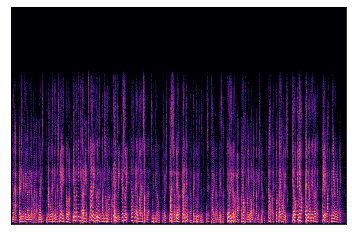

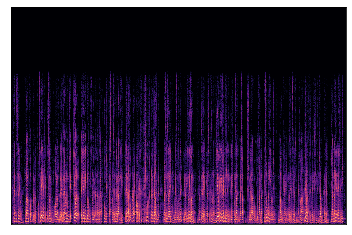

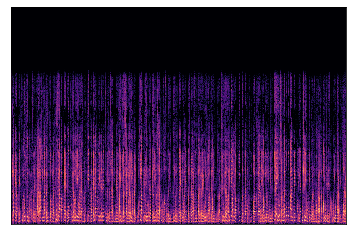

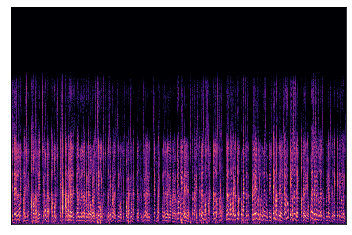

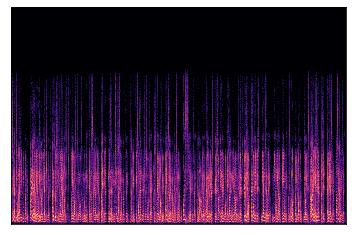

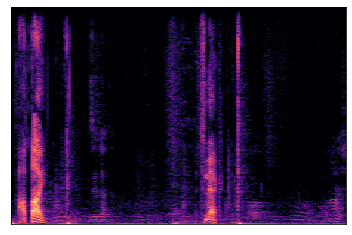

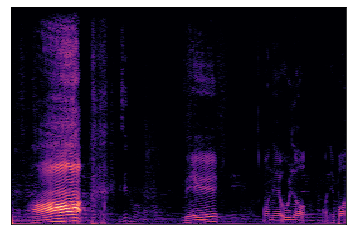

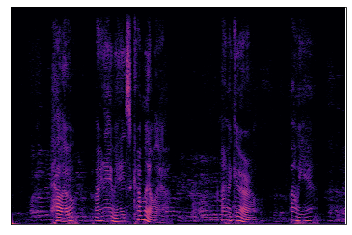

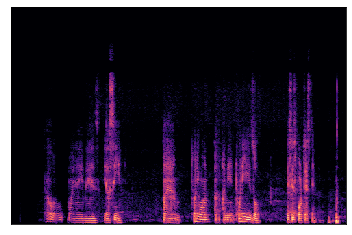

In [22]:
for i in os.listdir(male_test):
    audio=os.path.join(male_test,i)
    wave_plot(audio)
    plt.savefig("TEST DATA\male\male{}.png".format(i))

OSError: [Errno 22] Invalid argument: 'TEST DATA\x0cemale\x0cemalefemale1.wav.png'

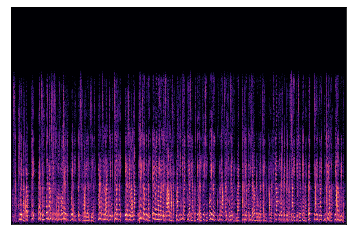

In [21]:
for i in os.listdir(female_test):
    audio=os.path.join(female_test,i)
    wave_plot(audio)
    plt.savefig("TEST DATA\female\female{}.png".format(i))

# TESTING

In [6]:
model=tf.keras.models.load_model("My_model\DEEP_AUDIO")

In [27]:
categories=["female","male"]

image_path= os.path.join("TEST DATA","male","malerabah.wav.png")
img= cv.imread(image_path)
array= img.reshape(-1,432,288,3)

AttributeError: 'NoneType' object has no attribute 'reshape'

In [26]:
prediction= model.predict([array])
print(categories[int(prediction[0][0])])

female
